In [1]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model, losses
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Layer
from tensorflow.keras.datasets import cifar10
import numpy as np

In [2]:
(x_train, _), (x_test, _) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [5]:
class Encoder(Layer):
    def __init__(self, encoding_dim=1024, **kwargs):
        super(Encoder, self).__init__(**kwargs)
        self.encoding_dim = encoding_dim
    
    def build(self, input_shape):
        self.flatten = Flatten()
        self.dense = Dense(self.encoding_dim, activation="relu")
    
    def call(self, inputs):
        x = self.flatten(inputs)
        x = self.dense(x)
        return x

In [6]:
class Decoder(Layer):
    def __init__(self, output_dim=(32, 32, 3), **kwargs):
        super(Decoder, self).__init__(**kwargs)
        self.output_dim = output_dim
    
    def build(self, input_shape):
        self.dense = Dense(tf.reduce_prod(self.output_dim), activation="sigmoid")
        self.reshape = Reshape(self.output_dim)
    
    def call(self, inputs):
        x = self.dense(inputs)
        x = self.reshape(x)
        return x

In [7]:
class AutoEncoder(Model):
    def __init__(self, encoding_dim=1024, **kwargs):
        super(AutoEncoder, self).__init__(**kwargs)
        self.encoder = Encoder(encoding_dim=encoding_dim, name="encoder")
        self.decoder = Decoder((32, 32, 3), name="decoder")
    
    def call(self, inputs):
        x = self.encoder(inputs)
        x = self.decoder(x)
        return x

In [8]:
autoencoder = AutoEncoder(name="autoencoder")

In [9]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [10]:
history = autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.0206 - val_loss: 0.0162
Epoch 2/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.0104 - val_loss: 0.0113
Epoch 3/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.0081 - val_loss: 0.0084
Epoch 4/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.0073 - val_loss: 0.0073
Epoch 5/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.0069 - val_loss: 0.0066
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.0067 - val_loss: 0.0065
Epoch 7/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.0066 - val_loss: 0.0068
Epoch 8/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.0066 - val_loss: 0.0065
Epoch 9/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.0065 - val_loss: 0.0069
Epoch 10/10
1563/1563 [==============================] - 50s 32m

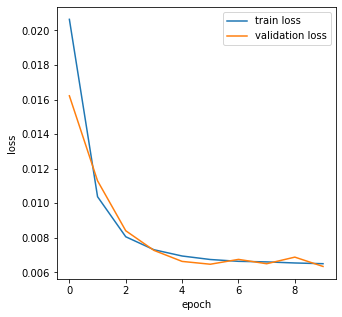

In [11]:
fig = plt.figure(figsize=(5, 5))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

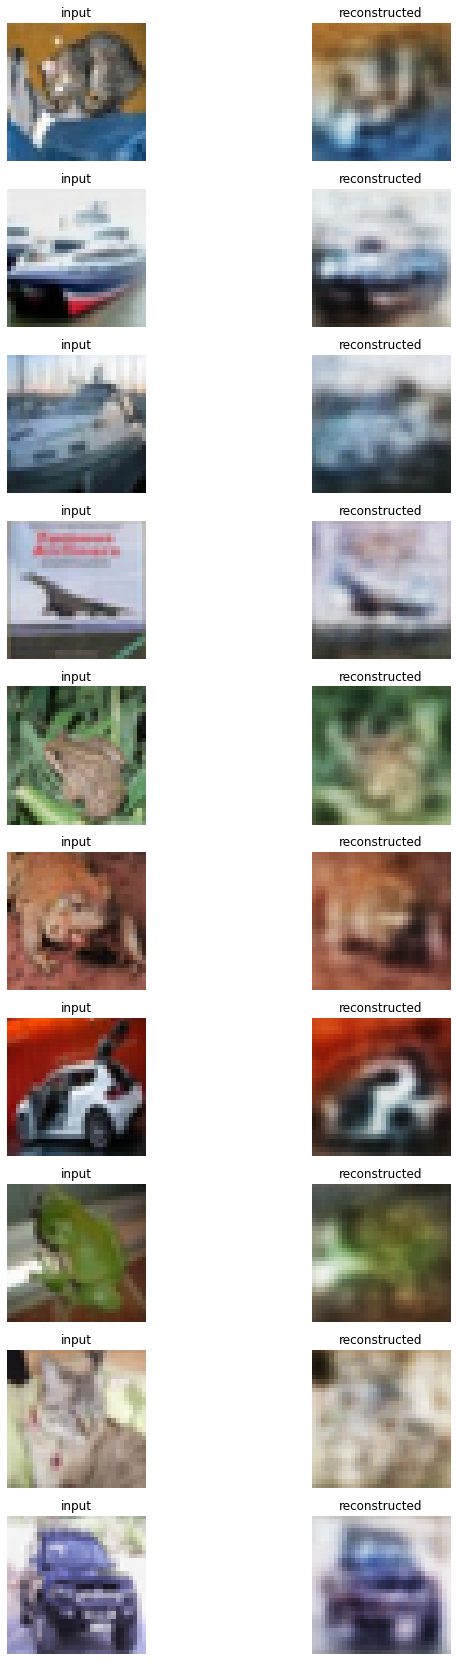

In [12]:
fig = plt.figure(figsize=(10, 30))
for i in range(10):
    ax1 = fig.add_subplot(10, 2, 2 * i + 1)
    ax2 = fig.add_subplot(10, 2, 2 * i + 2)
    ax1.axis('off')
    ax1.imshow(x_test[i])
    ax1.set_title('input')
    x = tf.expand_dims(x_test[i], 0)
    predicted = autoencoder.predict(x)
    ax2.axis('off')
    ax2.imshow(predicted[0])
    ax2.set_title('reconstructed')
plt.show()